# Fugacity of CH4 and N2 mixture from example 15.2 of [0529]

## Using cubic EOS

In [16]:
#classes
from eos import EOS
from alpha_r_cubic import AlphaRCubic
from mixture_fluid import MixtureFluid
from eos_mixture import EOSMixture

#objects
from purefluid import N2, CH4
from cp0 import N2_cp0_NIST, CH4_cp0_NIST

#other
from symbols import *
from mixture_rules import one_fluid_theory

############################################## EOS for pure fluids
# create PR EOS for both N2 and CH4
PR_expr = sp.log(abs(1/rho/(1/rho-b))) + 1/(R*T)*a/(4*b)*2**0.5*sp.log(abs((1/rho-b*(2**0.5-1))/(1/rho+b*(2**0.5+1))))
a_c_expr = 0.4572*R**2*T_c**2/P_c
alpha_T_expr = (1+(0.37464+1.5422*omega - 0.2699*omega**2)*(1-(T/T_c)**0.5))**2
b_expr = 0.07779607*R*T_c/P_c

N2_PR = EOS("N2_PR", N2, N2_cp0_NIST, AlphaRCubic, alpha_r_expr=PR_expr, a_c_expr=a_c_expr, alpha_T_expr=alpha_T_expr, b_expr=b_expr)
CH4_PR = EOS("CH4_PR", CH4, CH4_cp0_NIST, AlphaRCubic, alpha_r_expr=PR_expr, a_c_expr=a_c_expr, alpha_T_expr=alpha_T_expr, b_expr=b_expr)

############################################## EOS for pure mixture
#create mixture EOS
mix = MixtureFluid(N2, CH4)

mix_PR = EOSMixture("PR_N2_CH4", mix, AlphaRCubic, N2_PR, CH4_PR, mixture_rule=one_fluid_theory, delta=0, k_ij=[[0,0],[0,0]])


############################################## Example settings
# test against example 15.2 of chemical engineering book
pressure = 0.4119*1e6
temperature = 100
z = [0.958, 1-0.958]
density = 0.4119*1e6/(0.9059*R*temperature)

############################################## a, b and pressure
a = mix_PR.alpha_r.a.subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])
b = mix_PR.alpha_r.b.subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])
pressure = mix_PR.pressure.subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])

print(f"a = {a}")
print(f"b = {b}")
print(f"pressure  = {pressure}")

print("")

############################################## Fugacity coefficients
phi_i = mix_PR.fugacity_coefficients

fugacity_coefficients = [sp.log(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

print(f"logarithm of fugacity coefficients = {fugacity_coefficients}")

# fugacity coefficients = [-0.0879702573569293, -0.165118060729465]


a = 0.167790422109961
b = 0.0000241413168456887
pressure  = 411872.551697312

logarithm of fugacity coefficients = [-0.0876198646823038, -0.165992157451367]


## Using Helmholtz EOS without F argument

In [31]:
#classes
from eos import EOS
from alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid
from eos_mixture import EOSMixture

#objects
from purefluid import N2, CH4
from cp0 import N2_cp0_NIST, CH4_cp0_NIST
from presets import alpha_r_0543, alpha_r_0542

#other
from symbols import *

############################################## EOS for pure fluids
#create pure fluid EOS for both fluids
CH4_0543 = EOS("CH4_0543", CH4, CH4_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0543())
N2_0542 = EOS("N2_0542", N2, N2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0542())

############################################## EOS for pure mixture
#create mixture EOS
mix = MixtureFluid(N2, CH4)

mix_EOS = EOSMixture("N2_0542_CH4_0543", mix, AlphaRHelmholtz, N2_0542, CH4_0543)


############################################## Example settings
# test against example 15.2 of chemical engineering book
pressure = 0.4119*1e6
temperature = 100
z = [0.958, 1-0.958]
density = 0.4119*1e6/(0.9059*R*temperature)

##############################################pressure
pressure = mix_EOS.pressure.subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])

print(f"pressure  = {pressure}")

print("")

############################################## Fugacity coefficients
phi_i = mix_EOS.fugacity_coefficients

fugacity_coefficients = [sp.log(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

print(f"logarithm of fugacity coefficients = {fugacity_coefficients}")



pressure  = 413415.464630590

logarithm of fugacity coefficients = [-0.0834120191408151, -0.139510681675204]


## Using Helmholtz EOS with F argument

In [17]:
#classes
from eos import EOS
from alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid
from eos_mixture import EOSMixture

#objects
from purefluid import N2, CH4
from cp0 import N2_cp0_NIST, CH4_cp0_NIST
from presets import alpha_r_0543, alpha_r_0542

#other
from symbols import *

############################################## EOS for pure fluids
#create pure fluid EOS for both fluids
CH4_0543 = EOS("CH4_0543", CH4, CH4_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0543())
N2_0542 = EOS("N2_0542", N2, N2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0542())

############################################## EOS for mixture
#create mixture EOS
mix = MixtureFluid(N2, CH4)

#coefficients
k_pol = 2
k_exp = 7

n_ij = [-0.98038985517335e-2, 0.42487270143005e-3, -0.34800214576142e-1, -0.13333813013896, -0.11993694974627e-1, 0.69243379775168e-1, -0.31022508148249, 0.24495491753226, 0.22369816716981]
d_ij = [1, 4, 1, 2, 2, 2, 2, 2, 3]
t_ij = [0, 1.85, 7.85, 5.4, 0, 0.75, 2.8, 4.45, 4.25]

eta_ij = [0, 0, 1, 1, 0.25, 0, 0, 0, 0]
epsilon_ij = [0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
beta_ij =[0, 0, 1, 1, 2.5, 3, 3, 3, 3]
gamma_ij = [0, 0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# binary coefficients
beta_V =[[1, 0.998721377],[1/0.998721377, 1]]
gamma_V = [[1, 1.013950311], [1.013950311, 1]]
beta_T = [[1, 0.998098830],[1/0.998098830, 1]]
gamma_T = [[1, 0.979273013], [0.979273013, 1]]

mix_EOS = EOSMixture("N2_0542_CH4_0543", mix, AlphaRHelmholtz, N2_0542, CH4_0543,
                     beta_T=beta_T, gamma_T=gamma_T, beta_V=beta_V, gamma_V=gamma_V,
                     F=0, n_ij=n_ij, d_ij=d_ij, t_ij=t_ij, eta_ij=eta_ij, epsilon_ij=epsilon_ij, beta_ij=beta_ij, gamma_ij=gamma_ij,
                     k_pol=k_pol, k_exp=k_exp )


############################################## Example settings
# test against example 15.2 of chemical engineering book
pressure = 0.4119*1e6
temperature = 100
z = [0.958, 1-0.958]
density = 0.4119*1e6/(0.9059*R*temperature)

############################################## Pressure
pressure = mix_EOS.pressure.subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])

print(f"pressure  = {pressure}")

print("")

############################################## Fugacity coefficients
phi_i = mix_EOS.fugacity_coefficients

fugacity_coefficients = [sp.log(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

print(f"logarithm of fugacity coefficients = {fugacity_coefficients}")

# logarithm of fugacity coefficients = [-0.0876164978134070, -0.165991189041858]    with cubic EOS

# logarithm of fugacity coefficients = [-0.0831799070525770, -0.149228637763201]   with F = 1
# logarithm of fugacity coefficients = [-0.0832953768783173, -0.133129793184776]    with F = 0

pressure  = 413624.475380347

logarithm of fugacity coefficients = [-0.0832953768783173, -0.133129793184776]


# Fugacity of NH3 and H2 mixture

## Using cubic EOS

In [13]:

# classes
from eos import EOS
from eos_mixture import EOSMixture
from  alpha_r_cubic import AlphaRCubic
from mixture_fluid import MixtureFluid

# objects
from purefluid import NH3, H2
from cp0 import NH3_cp0_NIST, H2_cp0_NIST 


# algorithms and other functions and variables
from symbols import *
from mixture_rules import one_fluid_theory
from algorithms import MSRK_coefficients, calc_density_coefficients


############################################## EOS for pure fluids
#expressions for SRK
MSRK = {
    "alpha_r_expr": sp.log(abs((1/rho/(1/rho-b)))) + 1/(R*T)*a/b*sp.log(abs(1/rho/(1/rho+b))),
    "a_c_expr": 0.42748*R**2*T_c**2/P_c,
    "alpha_T_expr": (1+ (0.48503 + 1.5571*omega - 0.15613*omega**2)*(1-(T/T_c)**0.5))**2,
    "b_expr": 0.08664*R*T_c/P_c
}

#create pure fluid EOS from MSRK
MSRK_NH3 = EOS("SRK_NH3", NH3, NH3_cp0_NIST, AlphaRCubic, **MSRK)
MSRK_H2 = EOS("SRK_H2", H2, H2_cp0_NIST, AlphaRCubic, **MSRK)

############################################## EOS for pure mixture
#create mixture EOS
mix = MixtureFluid(H2, NH3)

mix_EOS = EOSMixture("MSRK_H2_NH3", mix, AlphaRCubic, MSRK_H2, MSRK_NH3, mixture_rule=one_fluid_theory)

####################################### Temperature and pressure and composition settings
temperature = 378
pressure = 100e5
z = [0.001,1-0.001]

####################################### density
densities = calc_density_coefficients(mix_EOS, pressure, temperature, *z, MSRK_coefficients)

#pick a value of density
density = densities[-1]
print(f"all densities = {densities}")
print(f"density = {density}")
####################################### fugacity
phi_i = mix_EOS.fugacity_coefficients

fugacity_coefficients = [sp.log(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

print(f"logarithm of fugacity coefficients = {fugacity_coefficients}")




all densities = [20101.6528981]
density = 20101.652898095374
logarithm of fugacity coefficients = [2.89504344563171, -0.610943981491470]


c:\Users\cd318\OneDrive - Imperial College London\UNI\PhD\Code\GitHub repos\EOS\algorithms.py:184: ComplexWarning: Casting complex values to real discards the imaginary part
  roots = np.sort(roots[~np.iscomplex(roots)].astype(float))  # Remove complex roots


## Using Helmholtz EOS, [0290] + [0313]

In [21]:
# classes
from eos import EOS
from eos_mixture import EOSMixture
from  alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid

# objects
from purefluid import NH3, H2
from cp0 import NH3_cp0_NIST, H2_cp0_NIST 

# algorithms and other functions and variables
from symbols import *
from other_functions import multi_root
from presets import alpha_r_0290, alpha_r_0313



####################################### EOS
#create pure fluid EOS for both fluids
NH3_0290 = EOS("NH3_0290", NH3, NH3_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0290())
H2_0313 = EOS("H2_0313", H2, H2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0313())

# create mixture and mixture EOS (hydrogen must be the first fluid)
mix = MixtureFluid(H2, NH3)

mix_EOS = EOSMixture("H2_0313_NH3_0290", mix, AlphaRHelmholtz, H2_0313, NH3_0290)

####################################### Temperature and pressure and composition settings
temperature = 298
pressure = 10e5
z = [0,1]

####################################### density
densities = multi_root(mix_EOS.pressure_equation, [1,5], (pressure, temperature, *z), n=1e5)

#pick a value of density
density = densities[-1]
print(f"all densities = {densities}")
print(f"density = {density} [mol/m3]")
print(f"density = {density*NH3.M} [kg/m3]")

####################################### fugacity
phi_i = mix_EOS.fugacity_coefficients

fugacity_coefficients = [(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

print(f"fugacity coefficients = {fugacity_coefficients}")



all densities = [  456.99390222  3941.95596019 35417.67122083]
density = 35417.6712208268 [mol/m3]
density = 603.1813580797152 [kg/m3]
fugacity coefficients = [148805.662252930, 0.895485336648989]


## Using Helmholtz EOS, [0300] + [0313]

In [7]:
# classes
from eos import EOS
from eos_mixture import EOSMixture
from  alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid

# objects
from purefluid import NH3, H2
from cp0 import NH3_cp0_NIST, H2_cp0_NIST 

# algorithms and other functions and variables
from symbols import *
from presets import alpha_r_0300, alpha_r_0313
from other_functions import multi_root

####################################### EOS
#create pure fluid EOS for both fluids
NH3_0300 = EOS("NH3_0300", NH3, NH3_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0300())
H2_0313 = EOS("H2_0313", H2, H2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0313())

############################################## EOS for pure mixture
#create mixture EOS
 
# mix = MixtureFluid(H2, NH3)
mix = MixtureFluid(NH3, H2)

# mixture cofficients from [0301]
n_ij = [-3.73558, -7.47092, 1.98413, 1.87191]
t_ij = [1.28, 2.05, 2.6, 3.13]
d_ij = [1, 2, 1, 2]

eta_ij = [0, 0, 0.61, 1.6]
beta_ij = [0, 0, 2.06, 1.74]
gamma_ij = [0, 0, 0.79, 2.1]
epsilon_ij = [0, 0, 0.8, 1.62]

k_pol = 2
k_exp = 0
k_gbs = 2

#binary parameters from [0301]
beta_T = [[1, 0.98824],[1/0.98824, 1]]  # because [0301] take ammonia to be the first component while I use hydrogen
gamma_T = [[1,1.1266], [1.1266,1]]
beta_V = [[1, 1.0103],[1/1.0103, 1]]    # because [0301] take ammonia to be the first component while I use hydrogen
gamma_V = [[1,0.7298], [0.7298,1]]

mix_EOS = EOSMixture("H2_0313_NH3_0300", mix, AlphaRHelmholtz, NH3_0300, H2_0313,
                     F=1, n_ij=n_ij, t_ij=t_ij, d_ij=d_ij, eta_ij=eta_ij, beta_ij=beta_ij, gamma_ij=gamma_ij, epsilon_ij=epsilon_ij,
                     beta_T=beta_T, beta_V=beta_V, gamma_T=gamma_T, gamma_V=gamma_V,
                     k_pol=k_pol, ke_exp=k_exp, k_gbs=k_gbs)

####################################### Temperature and pressure and composition settings
temperature = 298

pressure = 10.06 * 1e5
z = [1-0.198,0.198]


####################################### density
densities = multi_root(mix_EOS.pressure_equation, [1,5], (pressure, temperature, *z), n=1e5)

#pick a value of density
density = densities[0]
print(f"all densities = {densities}")
print(f"density = {density} [mol/m3]")
print(f"density = {density*mix.M.subs([(z1, z[0]), (z2, z[1])])} [kg/m3]")

print("")

#density of ammonia only
densities_ammonia = multi_root(NH3_0300.pressure_equation, [1,5], (pressure, temperature), n=1e4)

density_ammonia = densities_ammonia[0]
print(f"all densities of ammmonia = {densities_ammonia}")
print(f"density ammonia = {density_ammonia} [mol/m3]")
print(f"density ammonia = {density_ammonia*NH3.M} [kg/m3]")

print("")
# ####################################### fugacity
# phi_i = mix_EOS.fugacity_coefficients

# fugacity_coefficients = [(phi_i[i].subs([(z1, z[0]), (z2, z[1]), (T, temperature), (rho, density)])) for i in [0,1]]

# print(f"fugacity coefficients = {fugacity_coefficients}")


####################################### Experimental data from [0511]
# The following data corresponds to the vapour state, and the first index should be used for density

# | temperature (C) | Pressure (atm) | Z H2  | Z NH3 | Fugacity coefficient of ammonia |
# | --------------- | -------------- | ----- | ----- | ------------------------------- |
# | 55.4            | 96             | 0.849 | 0.151 | 0.776                           |
# | 80.9            | 34.49          | 0     | 1     | 0.816                           |
# | 55.4            | 35.81          | 0.653 | 0.347 | 0.863                           |
# | 80.9            | 39.1           | 0.09  | 0.91  | 0.794                           |
# | 55.3            | 11.47          | 0     | 1     | 0.917                           |



all densities = [ 432.19256539 5292.68658408]
density = 432.19256538658345 [mol/m3]
density = 6.07559940423623 [kg/m3]

all densities of ammmonia = [  460.17711216  3585.65806177 13123.22555143 21094.61999624
 35418.34464184]
density ammonia = 460.1771121561382 [mol/m3]
density ammonia = 7.837055512117355 [kg/m3]



# Debugging the EOS from [0301]

## Harcoding the EOS

In [19]:
# libraries
from symbols import * #includes sympy

# classes
from eos import EOS
from eos_mixture import EOSMixture
from alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid

# objects
from purefluid import NH3, H2
from cp0 import NH3_cp0_NIST , H2_cp0_NIST

# algorithms and other functions and variables
from presets import alpha_r_0300, alpha_r_0313
from other_functions import multi_root

####################################### EOS for pure ammonia from established code
#create pure fluid EOS for ammonia
NH3_0300 = EOS("NH3_0300", NH3, NH3_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0300())
H2_0313 = EOS("H2_0313", H2, H2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0313())

############################################################### ammonia
n = [0.006132232, 1.7395866, -2.2261792, -0.30127553, 0.08967023, -0.076387037, -0.84063963, -0.27026327, 6.212578, -5.7844357, 2.4817542, -2.3739168, 0.01493697, -3.7749264, 0.0006254348, -0.000017359, -0.13462033, 0.07749072839, -1.6909858, 0.93739074]
t = [1, 0.382, 1, 1, 0.677, 2.915, 3.51, 1.063, 0.655, 1.3, 3.1, 1.4395, 1.623, 0.643, 1.13, 4.5, 1, 4, 4.3315, 4.015]
d = [4, 1, 1, 2, 3, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1]    

l = [2, 2, 1]
eta = [0.42776, 0.6424, 0.8175, 0.7995, 0.91, 0.3574, 1.21, 4.14, 22.56, 22.68, 2.8452, 2.8342]
beta = [1.708, 1.4865, 2.0915, 2.43, 0.488, 1.1, 0.85, 1.14, 945.64, 993.85, 0.3696, 0.2962]
gamma = [1.036, 1.2777, 1.083, 1.2906, 0.928, 0.934, 0.919, 1.852, 1.05897, 1.05277, 1.108, 1.313]
epsilon = [-0.0726, -0.1274, 0.7527, 0.57, 2.2, -0.243, 2.96, 3.02, 0.9574, 0.9576, 0.4478, 0.44689]
b = [1.244, 0.6826]

alpha_r_0300 =  sum([n[i] * delta ** d[i] * tau ** t[i] for i in range(0, 5)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-delta ** l[i-5]) for i in range(5, 8)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-eta[i-8] * (delta - epsilon[i-8]) ** 2 - beta[i-8] * (tau - gamma[i-8])**2) for i in range(8, 18)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-eta[i-8] * (delta - epsilon[i-8]) ** 2 + 1/(beta[i-8] * (tau - gamma[i-8])**2 + b[i-18])) for i in range(18, 20)])

# print(alpha_r_0300.free_symbols)

############################################################### hydrogen
N = [-6.93643, 0.01, 2.1101, 4.52059, 0.732564, -1.34086, 0.130985, -0.777414, 0.351944, -0.0211716, 0.0226312, 0.032184, -0.0231752, 0.0557346]
t = [0.6844, 1, 0.989, 0.489, 0.803, 1.1444, 1.409, 1.754, 1.311, 4.187, 5.646, 0.791, 7.249, 2.986]
d = [1, 4, 1, 1, 2, 2, 3, 1, 3, 2, 1, 3, 1, 1]
p = [0, 0, 0, 0, 0, 0, 0, 1, 1]

phi = [-1.685, -0.489, -0.103, -2.506, -1.607]
beta = [-0.171, -0.2245, -0.1304, -0.2785, -0.3967]
gamma = [0.7164, 1.3444, 1.4517, 0.7204, 1.5445]
D = [1.506, 0.156, 1.736, 0.67, 1.662]

l = 7
m = 9
n = 14

alpha_r_0313 =  sum([N[i] * delta ** d[i] * tau ** t[i] for i in range(0, l)]) +\
                sum([N[i] * delta ** d[i] * tau ** t[i] * sp.exp(-delta ** p[i]) for i in range(l, m)]) + \
                sum([N[i] * delta ** d[i] * tau ** t[i] * sp.exp(phi[i-m] * (delta - D[i-m])**2 + beta[i-m] * (tau - gamma[i-m])**2) for i in range(m, n)])

# print(alpha_r_0313.free_symbols)


############################################################### mixture
# ammonia is the first fluid and hydrogen is the secod fluid

k_pol = 2
k_exp = 0
k_gbs = 2

n_ij = [-3.73558, -7.47092, 1.98413, 1.87191]
t_ij = [1.28, 2.05, 2.6, 3.13]
d_ij = [1, 2, 1, 2]
eta_ij = [0.61, 1.6]
beta_ij = [2.06, 1.74]
gamma_ij = [0.79, 2.1]
epsilon_ij = [0.8, 1.62]

beta_T = 0.98824
gamma_T = 1.1266
beta_V = 1.0103
gamma_V = 0.7298
F = 1

alpha_r_ij =    sum(n_ij[k] * delta ** d_ij[k] * tau ** t_ij[k] for k in range(0, k_pol)) + \
                sum(n_ij[k] * delta ** d_ij[k] * tau ** t_ij[k] * sp.exp(-eta_ij[k-k_pol] * (delta - epsilon_ij[k-k_pol])**2 - beta_ij[k-k_pol] * (tau - gamma_ij[k-k_pol])**2) for k in range(k_pol, k_pol + k_gbs))

Delta_alpha_r = x1 * x2 * F * alpha_r_ij

alpha_r_0301 = x1 * alpha_r_0300 + x2 * alpha_r_0313 + Delta_alpha_r

# print(alpha_r_0301.free_symbols)

############################################################### reduced variables for the mixture
T_r = x1**2 * NH3.T_c + x2**2 * H2.T_c + 2 * x1 * x2 * beta_T * gamma_T * (x1 + x2)/(beta_T**2 * x1 + x2) * (NH3.T_c * H2.T_c) ** 0.5
rho_r = 1 / (x1**2 / NH3.rho_c + x2**2 / H2.rho_c + 2 * x1 * x2 * beta_V * gamma_V * (x1 + x2)/(beta_V**2 * x1 + x2) * 1/8 * (NH3.rho_c**(-1/3) + H2.rho_c**(-1/3))**3)

############################################################## sub delta and tau for reduced variables and density and temperature and create pressure equation
# alpha_r_0301 = alpha_r_0301.subs([(delta, rho/rho_r), (tau, T_r/T)])
# pressure_equation = sp.lambdify((rho, P, T, x1, x2), P - rho*R*T*(1+rho*sp.diff(alpha_r_0301, rho)))


# ############################################################### Calculate pressure from delta and then sub the reduced vriables to create pressure equation
pressure = rho*R*T*(1+delta*sp.diff(alpha_r_0301, delta))
pressure = pressure.subs([(delta, rho/rho_r), (tau, T_r/T)])
pressure_equation = sp.lambdify((rho, P, T, x1, x2), P - pressure)


############################################################### Temperature and pressure and composition settings
temperature = 298

pressure = 100 * 101325
z = [1-0.01,0.01]

############################################################### Density at very small hydrogen percentage
densities = multi_root(pressure_equation, [-1,5], (pressure, temperature, *z), n=1e5)

#pick a value of density
density = densities[0]
print(f"all densities = {densities}")
print(f"density = {density} [mol/m3]")
# print(f"density = {density*mix.M.subs([(z1, z[0]), (z2, z[1])])} [kg/m3]")

print("")

#density of ammonia only
densities_ammonia = multi_root(NH3_0300.pressure_equation, [-1,6], (pressure, temperature), n=1e5)

density_ammonia = densities_ammonia[-1]
print(f"all densities of ammmonia = {densities_ammonia}")
print(f"density ammonia = {density_ammonia} [mol/m3]")
# print(f"density ammonia = {density_ammonia*NH3.M} [kg/m3]")

print("")

#density of hydrogen only
densities_hydrogen = multi_root(H2_0313.pressure_equation, [-1,5], (pressure, temperature), n=1e4)

density_hydrogen = densities_hydrogen[0]
print(f"all densities of hydrogen = {densities_hydrogen}")
print(f"density hydrogen = {density_hydrogen} [mol/m3]")
# print(f"density ammonia = {density_ammonia*NH3.M} [kg/m3]")

print("")



all densities = [43455.70601226]
density = 43455.70601226014 [mol/m3]

all densities of ammmonia = [16100.29474355 18467.8377413  35903.18039361]
density ammonia = 35903.18039360616 [mol/m3]

all densities of hydrogen = [3854.54318744]
density hydrogen = 3854.5431874353685 [mol/m3]



## Density as a function of hydrogen content at specific temperature and pressure using the EOS from [0301]

100%|██████████| 1001/1001 [01:57<00:00,  8.53it/s]


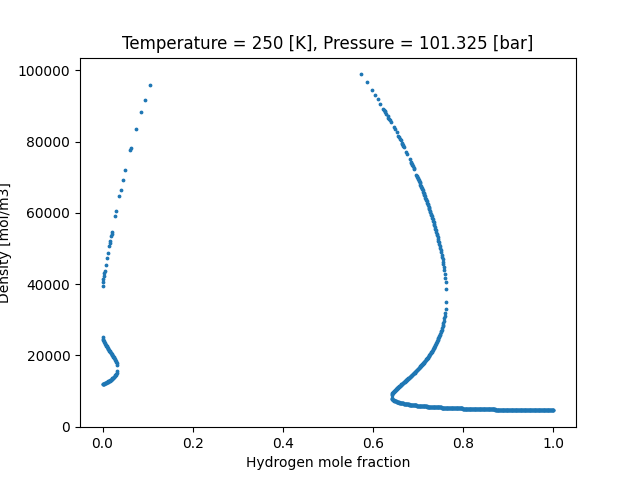

In [3]:
# libraries
from symbols import * #includes sympy
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
# classes
from eos import EOS
from eos_mixture import EOSMixture
from alpha_r_helmholtz import AlphaRHelmholtz
from mixture_fluid import MixtureFluid

# objects
from purefluid import NH3, H2
from cp0 import NH3_cp0_NIST , H2_cp0_NIST

# algorithms and other functions and variables
from presets import alpha_r_0300, alpha_r_0313
from other_functions import multi_root

%matplotlib widget

####################################### EOS for pure ammonia from established code
#create pure fluid EOS for ammonia
NH3_0300 = EOS("NH3_0300", NH3, NH3_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0300())
H2_0313 = EOS("H2_0313", H2, H2_cp0_NIST, AlphaRHelmholtz, alpha_r_expr=alpha_r_0313())

############################################################### ammonia
n = [0.006132232, 1.7395866, -2.2261792, -0.30127553, 0.08967023, -0.076387037, -0.84063963, -0.27026327, 6.212578, -5.7844357, 2.4817542, -2.3739168, 0.01493697, -3.7749264, 0.0006254348, -0.000017359, -0.13462033, 0.07749072839, -1.6909858, 0.93739074]
t = [1, 0.382, 1, 1, 0.677, 2.915, 3.51, 1.063, 0.655, 1.3, 3.1, 1.4395, 1.623, 0.643, 1.13, 4.5, 1, 4, 4.3315, 4.015]
d = [4, 1, 1, 2, 3, 3, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 1, 1, 1, 1]    

l = [2, 2, 1]
eta = [0.42776, 0.6424, 0.8175, 0.7995, 0.91, 0.3574, 1.21, 4.14, 22.56, 22.68, 2.8452, 2.8342]
beta = [1.708, 1.4865, 2.0915, 2.43, 0.488, 1.1, 0.85, 1.14, 945.64, 993.85, 0.3696, 0.2962]
gamma = [1.036, 1.2777, 1.083, 1.2906, 0.928, 0.934, 0.919, 1.852, 1.05897, 1.05277, 1.108, 1.313]
epsilon = [-0.0726, -0.1274, 0.7527, 0.57, 2.2, -0.243, 2.96, 3.02, 0.9574, 0.9576, 0.4478, 0.44689]
b = [1.244, 0.6826]

alpha_r_0300 =  sum([n[i] * delta ** d[i] * tau ** t[i] for i in range(0, 5)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-delta ** l[i-5]) for i in range(5, 8)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-eta[i-8] * (delta - epsilon[i-8]) ** 2 - beta[i-8] * (tau - gamma[i-8])**2) for i in range(8, 18)]) + \
                sum([n[i] * delta ** d[i] * tau ** t[i] * sp.exp(-eta[i-8] * (delta - epsilon[i-8]) ** 2 + 1/(beta[i-8] * (tau - gamma[i-8])**2 + b[i-18])) for i in range(18, 20)])

# print(alpha_r_0300.free_symbols)

############################################################### hydrogen
N = [-6.93643, 0.01, 2.1101, 4.52059, 0.732564, -1.34086, 0.130985, -0.777414, 0.351944, -0.0211716, 0.0226312, 0.032184, -0.0231752, 0.0557346]
t = [0.6844, 1, 0.989, 0.489, 0.803, 1.1444, 1.409, 1.754, 1.311, 4.187, 5.646, 0.791, 7.249, 2.986]
d = [1, 4, 1, 1, 2, 2, 3, 1, 3, 2, 1, 3, 1, 1]
p = [0, 0, 0, 0, 0, 0, 0, 1, 1]

phi = [-1.685, -0.489, -0.103, -2.506, -1.607]
beta = [-0.171, -0.2245, -0.1304, -0.2785, -0.3967]
gamma = [0.7164, 1.3444, 1.4517, 0.7204, 1.5445]
D = [1.506, 0.156, 1.736, 0.67, 1.662]

l = 7
m = 9
n = 14

alpha_r_0313 =  sum([N[i] * delta ** d[i] * tau ** t[i] for i in range(0, l)]) +\
                sum([N[i] * delta ** d[i] * tau ** t[i] * sp.exp(-delta ** p[i]) for i in range(l, m)]) + \
                sum([N[i] * delta ** d[i] * tau ** t[i] * sp.exp(phi[i-m] * (delta - D[i-m])**2 + beta[i-m] * (tau - gamma[i-m])**2) for i in range(m, n)])

# print(alpha_r_0313.free_symbols)


############################################################### mixture
# ammonia is the first fluid and hydrogen is the secod fluid

k_pol = 2
k_exp = 0
k_gbs = 2

n_ij = [-3.73558, -7.47092, 1.98413, 1.87191]
t_ij = [1.28, 2.05, 2.6, 3.13]
d_ij = [1, 2, 1, 2]
eta_ij = [0.61, 1.6]
beta_ij = [2.06, 1.74]
gamma_ij = [0.79, 2.1]
epsilon_ij = [0.8, 1.62]

beta_T = 0.98824
gamma_T = 1.1266
beta_V = 1.0103
gamma_V = 0.7298
F = 1

alpha_r_ij =    sum(n_ij[k] * delta ** d_ij[k] * tau ** t_ij[k] for k in range(0, k_pol)) + \
                sum(n_ij[k] * delta ** d_ij[k] * tau ** t_ij[k] * sp.exp(-eta_ij[k-k_pol] * (delta - epsilon_ij[k-k_pol])**2 - beta_ij[k-k_pol] * (tau - gamma_ij[k-k_pol])**2) for k in range(k_pol, k_pol + k_gbs))

Delta_alpha_r = x1 * x2 * F * alpha_r_ij

alpha_r_0301 = x1 * alpha_r_0300 + x2 * alpha_r_0313 + Delta_alpha_r

# print(alpha_r_0301.free_symbols)

############################################################### reduced variables for the mixture
T_r = x1**2 * NH3.T_c + x2**2 * H2.T_c + 2 * x1 * x2 * beta_T * gamma_T * (x1 + x2)/(beta_T**2 * x1 + x2) * (NH3.T_c * H2.T_c) ** 0.5
rho_r = 1 / (x1**2 / NH3.rho_c + x2**2 / H2.rho_c + 2 * x1 * x2 * beta_V * gamma_V * (x1 + x2)/(beta_V**2 * x1 + x2) * 1/8 * (NH3.rho_c**(-1/3) + H2.rho_c**(-1/3))**3)

############################################################## sub delta and tau for reduced variables and density and temperature and create pressure equation
alpha_r_0301 = alpha_r_0301.subs([(delta, rho/rho_r), (tau, T_r/T)])
pressure_equation = sp.lambdify((rho, P, T, x1, x2), P - rho*R*T*(1+rho*sp.diff(alpha_r_0301, rho)))


############################################################### Temperature and pressure and composition settings
temperature = 250

pressure = 100 * 101325

compositions = np.linspace(0, 1, 1000 +1)

############################################################### Densities
fig, ax = plt.subplots()
density_roots = []
for z1 in tqdm(compositions):
    z = [1-z1, z1]
    densities = multi_root(pressure_equation, [2,5], (pressure, temperature, *z), n=1e5)
    # print(f"all densities = {densities}")

    # draw
    ax.scatter([z1]*len(densities), densities, color="tab:blue", s=3)

ax.set(xlabel="Hydrogen mole fraction", ylabel="Density [mol/m3]", title=f"Temperature = {temperature} [K], Pressure = {pressure/1e5} [bar]")
plt.show()

